In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/11816/Desktop/mechine learning/HW5/hw5_treasury yield curve data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 32 columns):
Date         8353 non-null object
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 n

In [3]:
da=df.iloc[:,1:]
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 31 columns):
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 non-null float64
SVENF26      8353 

In [4]:
data_unadjusted=da.fillna(da.iloc[:,30].mean())
data_unadjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 31 columns):
SVENF01      8353 non-null float64
SVENF02      8353 non-null float64
SVENF03      8353 non-null float64
SVENF04      8353 non-null float64
SVENF05      8353 non-null float64
SVENF06      8353 non-null float64
SVENF07      8353 non-null float64
SVENF08      8353 non-null float64
SVENF09      8353 non-null float64
SVENF10      8353 non-null float64
SVENF11      8353 non-null float64
SVENF12      8353 non-null float64
SVENF13      8353 non-null float64
SVENF14      8353 non-null float64
SVENF15      8353 non-null float64
SVENF16      8353 non-null float64
SVENF17      8353 non-null float64
SVENF18      8353 non-null float64
SVENF19      8353 non-null float64
SVENF20      8353 non-null float64
SVENF21      8353 non-null float64
SVENF22      8353 non-null float64
SVENF23      8353 non-null float64
SVENF24      8353 non-null float64
SVENF25      8353 non-null float64
SVENF26      8353 

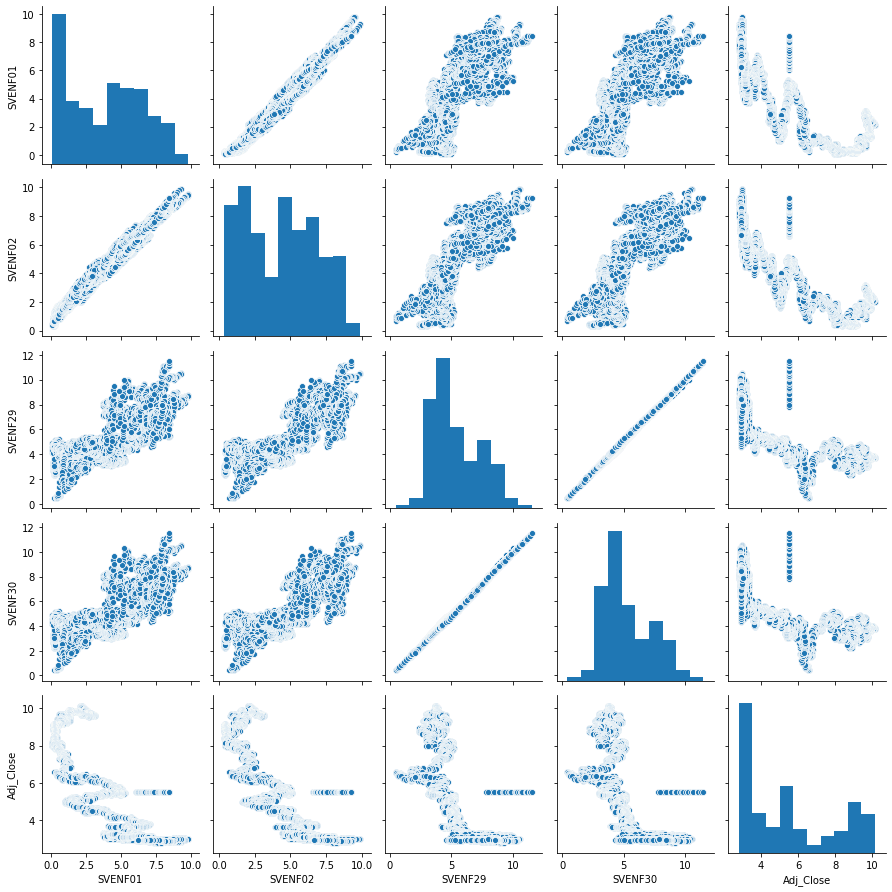

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cols = ['SVENF01', 'SVENF02', 'SVENF29', 'SVENF30', 'Adj_Close']
sns.pairplot(data_unadjusted[cols], height=2.5)
plt.tight_layout()
plt.show()

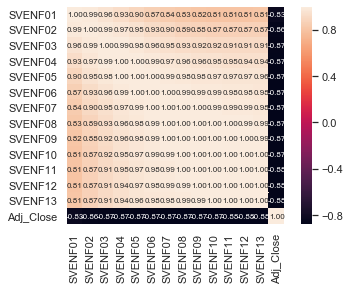

In [6]:
import numpy as np
cols1 = ['SVENF01','SVENF02','SVENF03','SVENF04','SVENF05','SVENF06', 'SVENF07', 'SVENF08', 'SVENF09','SVENF10'
         ,'SVENF11','SVENF12','SVENF13','Adj_Close']
cm = np.corrcoef(data_unadjusted[cols1].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 8},yticklabels=cols1,
                xticklabels=cols1)
plt.show()

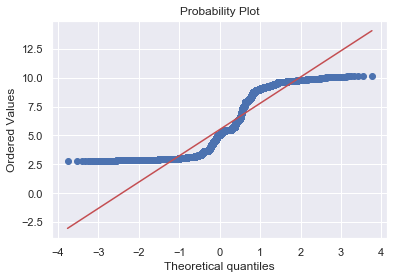

In [7]:
import scipy.stats as stats
Adj_Close = data_unadjusted['Adj_Close']
stats.probplot(Adj_Close, dist="norm", plot=plt)
plt.show()

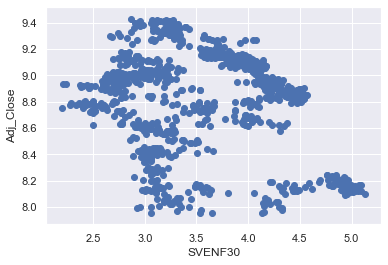

In [8]:
attribute1 = data_unadjusted.iloc[1000:2000,29]
attribute2 = data_unadjusted.iloc[1000:2000,30]
plt.scatter(attribute1, attribute2)
plt.xlabel('SVENF30')
plt.ylabel('Adj_Close')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X = data_unadjusted.iloc[:, :-1].values
y = data_unadjusted['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
print(ridge.coef_)

MSE train: 0.936, test: 0.957
R^2 train: 0.844, test: 0.840
[-0.07156439 -0.24829552 -0.14805399 -0.02933589  0.01900327  0.01763987
 -0.00071366 -0.01627844 -0.02241706 -0.02033781 -0.01490085 -0.01104387
 -0.01268476 -0.02191815 -0.03892765 -0.06253885 -0.09020523 -0.11889711
 -0.14522098 -0.16573493 -0.17723757 -0.17685426 -0.16210792 -0.13128256
 -0.08289748 -0.01602778  0.06964611  0.17428441  0.29734147  0.43845707]


In [11]:
from sklearn import svm
clf_svr = svm.SVR(kernel='rbf')
clf_svr.fit(X_train, y_train)
y_train_pred = clf_svr.predict(X_train)
y_test_pred = clf_svr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE train: 0.100, test: 0.095
R^2 train: 0.983, test: 0.984


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.80519508e+01 1.17303862e+00 6.23358872e-01 1.34640320e-01
 1.89971258e-02 1.94335332e-03 2.63308088e-04 3.09638572e-05
 2.33904199e-06 1.84880497e-07 1.32228616e-08 1.06680924e-09
 2.57930777e-10 1.83814731e-10 1.92066392e-10 1.99533826e-10
 2.41201706e-10 2.40387059e-10 2.35041931e-10 2.33661923e-10
 2.07409980e-10 2.29134321e-10 2.27072964e-10 2.24707733e-10
 2.10219997e-10 2.11962803e-10 2.13015823e-10 2.16497031e-10
 2.17819013e-10 2.20621168e-10]


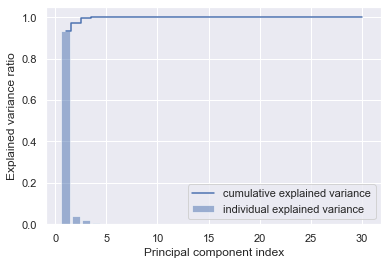

In [13]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,31), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca1 = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([9.34933329e-01, 3.90957802e-02, 2.07757025e-02, 4.48737856e-03,
       6.33148338e-04, 6.47693202e-05, 8.77570007e-06, 1.03198320e-06,
       7.79570848e-08, 6.16181525e-09, 4.40699981e-10, 3.55553006e-11,
       8.59648047e-12, 8.03892235e-12, 8.01177282e-12, 7.83362535e-12,
       7.78762935e-12, 7.63674060e-12, 7.56803994e-12, 7.48919827e-12,
       7.35300638e-12, 7.25962050e-12, 7.21555482e-12, 7.09951841e-12,
       7.06442369e-12, 7.00634761e-12, 6.91269642e-12, 6.65018384e-12,
       6.40131451e-12, 6.12629333e-12])

In [15]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
ridge = Ridge(alpha=100)
ridge.fit(X_train_pca, y_train)
y_train_pred = ridge.predict(X_train_pca)
y_test_pred = ridge.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
print(ridge.coef_)

MSE train: 1.067, test: 1.092
R^2 train: 0.822, test: 0.818
[-0.3963616  -0.62007367  0.29210495]


In [16]:
clf_svr = svm.SVR(kernel='rbf')
clf_svr.fit(X_train_pca, y_train)
y_train_pred = clf_svr.predict(X_train_pca)
y_test_pred = clf_svr.predict(X_test_pca)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE train: 0.168, test: 0.161
R^2 train: 0.972, test: 0.973


In [17]:
pca.explained_variance_ratio_

array([0.93493333, 0.03909578, 0.0207757 ])

In [18]:
print("My name is Binjie Xu")
print("My NetID is: binjiex2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Binjie Xu
My NetID is: binjiex2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
